# training/test dataset, learning rate, normalization

## TensorFlow

In [1]:
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# training data
x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

# test data
x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]

In [3]:
X = tf.placeholder('float', [None, 3])
Y = tf.placeholder('float', [None, 3])
W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

In [4]:
# correct prediction test model
prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# lauch graph
with tf.Session() as sess:
    # initialize
    sess.run(tf.global_variables_initializer())
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict = {X: x_data, Y: y_data})
        if step % 20 == 0:
            print(step, cost_val, W_val)
    
    print('Prediction: ', sess.run(prediction, feed_dict = {X: x_test}))
    print('Accuracy: ', sess.run(accuracy, feed_dict = {X: x_test, Y: y_test}))

0 5.081255 [[ 0.13583648 -0.38768765  0.13107213]
 [ 1.2640156   0.25108227  0.11305523]
 [-1.138201   -0.6354152   1.051393  ]]
20 1.1196831 [[-0.08479314 -0.3130521   0.27706623]
 [ 1.1134173   0.52133304 -0.00659726]
 [-0.73146725 -0.08336414  0.09260829]]
40 0.9096384 [[-0.27067417 -0.34074715  0.49064234]
 [ 0.9416875   0.4565288   0.22993684]
 [-0.480514   -0.01893142 -0.22277766]]
60 0.805599 [[-0.42029938 -0.36904278  0.66856307]
 [ 0.8317414   0.44416612  0.3522457 ]
 [-0.3049622   0.00357615 -0.42083693]]
80 0.7462896 [[-0.5491432  -0.39119464  0.8195588 ]
 [ 0.7664158   0.4490647   0.41267267]
 [-0.18447335  0.01050187 -0.54825145]]
100 0.7067431 [[-0.66526926 -0.40673265  0.9512226 ]
 [ 0.72971314  0.45753232  0.44090754]
 [-0.09939905  0.01234195 -0.63516587]]
120 0.6771265 [[-0.77247876 -0.41679192  1.0684913 ]
 [ 0.71009207  0.46591008  0.45215103]
 [-0.03601373  0.01225056 -0.6984597 ]]
140 0.6532589 [[-0.8727738  -0.4225925   1.1745868 ]
 [ 0.70021766  0.47354227  0.45

#### with a learning rate too big

In [8]:
X = tf.placeholder('float', [None, 3])
Y = tf.placeholder('float', [None, 3])
W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 10).minimize(cost)
prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict = {X: x_data, Y: y_data})
        if step in range(3):
            print(step, cost_val, W_val)
    
    print('Prediction: ', sess.run(prediction, feed_dict = {X: x_test}))
    print('Accuracy: ', sess.run(accuracy, feed_dict = {X: x_test, Y: y_test}))

0 5.547776 [[ 0.16383046  0.74922574  0.4181232 ]
 [-0.6922212  -1.2154421   0.6945758 ]
 [-0.41564     2.3490064  -1.9734311 ]]
1 nan [[  2.5918891  -4.7040043   3.4432943]
 [ 15.401256  -25.74788     9.13354  ]
 [ 15.749678  -21.73063     5.9408884]]
2 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
Prediction:  [0 0 0]
Accuracy:  0.0


#### or too small

In [10]:
X = tf.placeholder('float', [None, 3])
Y = tf.placeholder('float', [None, 3])
W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-10).minimize(cost)
prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict = {X: x_data, Y: y_data})
        if step % 20 == 0:
            print(step, cost_val, W_val)
    
    print('Prediction: ', sess.run(prediction, feed_dict = {X: x_test}))
    print('Accuracy: ', sess.run(accuracy, feed_dict = {X: x_test, Y: y_test}))

0 8.336342 [[ 0.14300556  1.3906915  -0.55591047]
 [ 1.4210382  -0.26613915  0.6132015 ]
 [ 0.43897402 -1.5544853   0.79460126]]
20 8.336342 [[ 0.14300556  1.3906915  -0.55591047]
 [ 1.4210382  -0.26613915  0.6132015 ]
 [ 0.43897402 -1.5544853   0.79460126]]
40 8.336342 [[ 0.14300556  1.3906915  -0.55591047]
 [ 1.4210382  -0.26613915  0.6132015 ]
 [ 0.43897402 -1.5544853   0.79460126]]
60 8.336342 [[ 0.14300556  1.3906915  -0.55591047]
 [ 1.4210382  -0.26613915  0.6132015 ]
 [ 0.43897402 -1.5544853   0.79460126]]
80 8.336342 [[ 0.14300556  1.3906915  -0.55591047]
 [ 1.4210382  -0.26613915  0.6132015 ]
 [ 0.43897402 -1.5544853   0.79460126]]
100 8.336342 [[ 0.14300556  1.3906915  -0.55591047]
 [ 1.4210382  -0.26613915  0.6132015 ]
 [ 0.43897402 -1.5544853   0.79460126]]
120 8.336342 [[ 0.14300556  1.3906915  -0.55591047]
 [ 1.4210382  -0.26613915  0.6132015 ]
 [ 0.43897402 -1.5544853   0.79460126]]
140 8.336342 [[ 0.14300556  1.3906915  -0.55591047]
 [ 1.4210382  -0.26613915  0.6132015 

### Non-normalized inputs

In [5]:
import numpy as np

In [16]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [21]:
X = tf.placeholder('float', [None, 4])
Y = tf.placeholder('float', [None, 1])
W = tf.Variable(tf.random_normal([4, 1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], \
                                   feed_dict = {X: x_data, Y: y_data})
    if step in range(7):
        print(step, 'Cost: ', cost_val, '\nPrediction: \n', hy_val)

0 Cost:  18062332000.0 
Prediction: 
 [[ -93872.016]
 [-190137.45 ]
 [-149336.73 ]
 [-104352.29 ]
 [-123180.48 ]
 [-124227.77 ]
 [-113774.76 ]
 [-145167.39 ]]
1 Cost:  1.9844726e+25 
Prediction: 
 [[3.1423450e+12]
 [6.3258624e+12]
 [4.9763278e+12]
 [3.4883793e+12]
 [4.1112416e+12]
 [4.1458451e+12]
 [3.7998103e+12]
 [4.8379142e+12]]
2 Cost:  inf 
Prediction: 
 [[-1.0415727e+20]
 [-2.0967924e+20]
 [-1.6494710e+20]
 [-1.1562704e+20]
 [-1.3627265e+20]
 [-1.3741963e+20]
 [-1.2594985e+20]
 [-1.6035920e+20]]
3 Cost:  inf 
Prediction: 
 [[3.4524333e+27]
 [6.9501021e+27]
 [5.4673948e+27]
 [3.8326148e+27]
 [4.5169412e+27]
 [4.5549595e+27]
 [4.1747777e+27]
 [5.3153222e+27]]
4 Cost:  inf 
Prediction: 
 [[-1.1443555e+35]
 [-2.3037050e+35]
 [-1.8122416e+35]
 [-1.2703717e+35]
 [-1.4972009e+35]
 [-1.5098026e+35]
 [-1.3837863e+35]
 [-1.7618349e+35]]
5 Cost:  inf 
Prediction: 
 [[inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]]
6 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]


In [26]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

xy = MinMaxScaler(xy)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
xy

array([[0.9999999 , 0.9999999 , 0.        , 0.9999999 , 0.9999999 ],
       [0.70548484, 0.70439545, 0.9999999 , 0.71881775, 0.83755783],
       [0.54412544, 0.50274819, 0.5760869 , 0.60646794, 0.66063303],
       [0.33890349, 0.3136802 , 0.10869564, 0.4598913 , 0.43800914],
       [0.51435995, 0.42582385, 0.3043478 , 0.585048  , 0.42624397],
       [0.49556174, 0.42582385, 0.31521736, 0.48131129, 0.49276132],
       [0.11436063, 0.        , 0.20652172, 0.22007774, 0.18597236],
       [0.        , 0.07747099, 0.53260864, 0.        , 0.        ]])

In [28]:
X = tf.placeholder('float', [None, 4])
Y = tf.placeholder('float', [None, 1])
W = tf.Variable(tf.random_normal([4, 1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], \
                                   feed_dict = {X: x_data, Y: y_data})
    if step in list(range(7))+[2000]:
        print(step, 'Cost: ', cost_val, '\nPrediction: \n', hy_val)

0 Cost:  0.15934879 
Prediction: 
 [[ 0.35976   ]
 [ 0.647148  ]
 [ 0.29456604]
 [ 0.01287292]
 [ 0.0657032 ]
 [ 0.11226761]
 [-0.23065524]
 [ 0.25600368]]
1 Cost:  0.15934011 
Prediction: 
 [[ 0.35977784]
 [ 0.6471641 ]
 [ 0.29457965]
 [ 0.01288375]
 [ 0.06571597]
 [ 0.11227983]
 [-0.23064725]
 [ 0.25601113]]
2 Cost:  0.15933141 
Prediction: 
 [[ 0.35979575]
 [ 0.6471802 ]
 [ 0.29459327]
 [ 0.01289459]
 [ 0.06572868]
 [ 0.11229213]
 [-0.23063926]
 [ 0.25601852]]
3 Cost:  0.15932271 
Prediction: 
 [[ 0.35981363]
 [ 0.6471965 ]
 [ 0.29460686]
 [ 0.01290545]
 [ 0.06574136]
 [ 0.11230433]
 [-0.23063126]
 [ 0.25602597]]
4 Cost:  0.159314 
Prediction: 
 [[ 0.35983157]
 [ 0.64721256]
 [ 0.2946205 ]
 [ 0.01291619]
 [ 0.06575413]
 [ 0.11231656]
 [-0.23062328]
 [ 0.25603336]]
5 Cost:  0.15930532 
Prediction: 
 [[ 0.35984942]
 [ 0.6472286 ]
 [ 0.29463425]
 [ 0.01292703]
 [ 0.06576681]
 [ 0.1123288 ]
 [-0.23061529]
 [ 0.2560408 ]]
6 Cost:  0.15929662 
Prediction: 
 [[ 0.35986733]
 [ 0.6472447 ]
 

### MNIST Data

In [36]:
from tensorflow.examples.tutorials.mnist import input_data

In [37]:
import matplotlib.pyplot as plt
import random
%matplotlib inline

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch:  0001 cost = 2.583715345
Epoch:  0002 cost = 1.100212263
Epoch:  0003 cost = 0.875636507
Epoch:  0004 cost = 0.761852958
Epoch:  0005 cost = 0.689174994
Epoch:  0006 cost = 0.636354402
Epoch:  0007 cost = 0.596593750
Epoch:  0008 cost = 0.565355184
Epoch:  0009 cost = 0.539977395
Epoch:  0010 cost = 0.519003762
Epoch:  0011 cost = 0.501282826
Epoch:  0012 cost = 0.486014978
Epoch:  0013 cost = 0.472779119
Epoch:  0014 cost = 0.461226143
Epoch:  0015 cost = 0.450410709
Accuracy:  0.8925
Label:  [6]
Prediction:  [6]


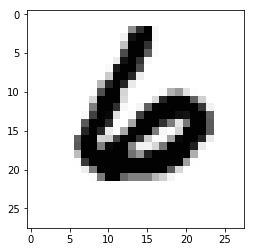

In [39]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot = True)
nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

# test model (one hot == one hot)
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # one pass  of all training examples
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict = {X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
            
        print('Epoch: ', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
    
    # session.run() or ____.eval
    print('Accuracy: ', accuracy.eval(session = sess, \
                                 feed_dict = {X: mnist.test.images, Y: mnist.test.labels}))
    
    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print('Label: ', sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print('Prediction: ', sess.run(tf.argmax(hypothesis, 1), \
                               feed_dict ={X: mnist.test.images[r:r+1]}))

    plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap = 'Greys',\
          interpolation = 'nearest')

## PyTorch

In [5]:
import torch
import torch.nn as nn

In [8]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, nb_classes):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, nb_classes)
        
    def forward(self, x):
        return self.linear(x)

In [10]:
# training data
x_data = torch.from_numpy(np.array([[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]], dtype = np.float32))
_, y_data = torch.max(torch.from_numpy(np.array([[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]])), 1) # one-hot

# test data
x_test = torch.from_numpy(np.array([[2, 1, 1], [3, 1, 2], [3, 3, 4]], dtype = np.float32))
_, y_test = torch.max(torch.from_numpy(np.array([[0, 0, 1], [0, 0, 1], [0, 0, 1]])), 1)

input_size = 3
nb_classes = 3
num_epochs = 201
learning_rate = 0.1

In [24]:
model = LogisticRegressionModel(input_size, nb_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

for epoch in range(num_epochs):
    y_pred = model(x_data)
    _, predicted = torch.max(y_pred, 1)
    loss = criterion(y_pred, y_data)
    accuracy = torch.mean(torch.eq(y_data, predicted).float())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 20 == 0:
        print('Cost: ', loss)

_, pred = torch.max(model(x_test), 1)
print('Prediction: ', pred)
print('Accuracy: ', torch.mean(torch.eq(y_test, pred).float()))

Cost:  tensor(1.3186, grad_fn=<NllLossBackward>)
Cost:  tensor(0.9118, grad_fn=<NllLossBackward>)
Cost:  tensor(0.8203, grad_fn=<NllLossBackward>)
Cost:  tensor(0.7632, grad_fn=<NllLossBackward>)
Cost:  tensor(0.7219, grad_fn=<NllLossBackward>)
Cost:  tensor(0.6897, grad_fn=<NllLossBackward>)
Cost:  tensor(0.6634, grad_fn=<NllLossBackward>)
Cost:  tensor(0.6414, grad_fn=<NllLossBackward>)
Cost:  tensor(0.6225, grad_fn=<NllLossBackward>)
Cost:  tensor(0.6060, grad_fn=<NllLossBackward>)
Cost:  tensor(0.5913, grad_fn=<NllLossBackward>)
Prediction:  tensor([2, 2, 2])
Accuracy:  tensor(1.)


with a learning rate too big

In [28]:
learning_rate = 10.0

model = LogisticRegressionModel(input_size, nb_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

for epoch in range(num_epochs):
    y_pred = model(x_data)
    _, predicted = torch.max(y_pred, 1)
    loss = criterion(y_pred, y_data)
    accuracy = torch.mean(torch.eq(y_data, predicted).float())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 20 == 0:
        print('Cost: ', loss)

_, pred = torch.max(model(x_test), 1)
print('Prediction: ', pred)
print('Accuracy: ', torch.mean(torch.eq(y_test, pred).float()))

Cost:  tensor(3.6035, grad_fn=<NllLossBackward>)
Cost:  tensor(122.5742, grad_fn=<NllLossBackward>)
Cost:  tensor(67.4469, grad_fn=<NllLossBackward>)
Cost:  tensor(73.2545, grad_fn=<NllLossBackward>)
Cost:  tensor(67.5036, grad_fn=<NllLossBackward>)
Cost:  tensor(34.6190, grad_fn=<NllLossBackward>)
Cost:  tensor(49.6436, grad_fn=<NllLossBackward>)
Cost:  tensor(31.9465, grad_fn=<NllLossBackward>)
Cost:  tensor(31.7522, grad_fn=<NllLossBackward>)
Cost:  tensor(90.6025, grad_fn=<NllLossBackward>)
Cost:  tensor(30.4145, grad_fn=<NllLossBackward>)
Prediction:  tensor([2, 2, 2])
Accuracy:  tensor(1.)


or too small

In [29]:
learning_rate = 1e-10

model = LogisticRegressionModel(input_size, nb_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

for epoch in range(num_epochs):
    y_pred = model(x_data)
    _, predicted = torch.max(y_pred, 1)
    loss = criterion(y_pred, y_data)
    accuracy = torch.mean(torch.eq(y_data, predicted).float())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 20 == 0:
        print('Cost: ', loss)

_, pred = torch.max(model(x_test), 1)
print('Prediction: ', pred)
print('Accuracy: ', torch.mean(torch.eq(y_test, pred).float()))

Cost:  tensor(2.4857, grad_fn=<NllLossBackward>)
Cost:  tensor(2.4857, grad_fn=<NllLossBackward>)
Cost:  tensor(2.4857, grad_fn=<NllLossBackward>)
Cost:  tensor(2.4857, grad_fn=<NllLossBackward>)
Cost:  tensor(2.4857, grad_fn=<NllLossBackward>)
Cost:  tensor(2.4857, grad_fn=<NllLossBackward>)
Cost:  tensor(2.4857, grad_fn=<NllLossBackward>)
Cost:  tensor(2.4857, grad_fn=<NllLossBackward>)
Cost:  tensor(2.4857, grad_fn=<NllLossBackward>)
Cost:  tensor(2.4857, grad_fn=<NllLossBackward>)
Cost:  tensor(2.4857, grad_fn=<NllLossBackward>)
Prediction:  tensor([0, 0, 0])
Accuracy:  tensor(0.)


### Non-normalized inputs

In [37]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_data = torch.Tensor(xy[:, 0:-1])
y_data = torch.Tensor(xy[:, [-1]])

input_size = 4
nb_classes = 1
num_epochs = 2001
learning_rate = 1e-5

In [32]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, nb_classes):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, nb_classes)
    def forward(self, x):
        return self.linear(x)

In [39]:
model = LinearRegressionModel(input_size, nb_classes)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for epoch in range(num_epochs):
    y_pred = model(x_data)
    loss = criterion(y_data, y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch in range(6):
        print(epoch, 'Cost: ', loss.item(), '\tPrediction: ', y_pred)

0 Cost:  2243173023744.0 	Prediction:  tensor([[374123.5625],
        [753039.5000],
        [592411.5625],
        [415308.4375],
        [489445.2500],
        [493563.2188],
        [452376.0625],
        [575933.5000]], grad_fn=<ThAddmmBackward>)
1 Cost:  1.577299211714007e+29 	Prediction:  tensor([[ -99047465549824.],
        [-199392699088896.],
        [-156855040999424.],
        [-109954551775232.],
        [-129587317047296.],
        [-130678029025280.],
        [-119770934411264.],
        [-152492209864704.]], grad_fn=<ThAddmmBackward>)
2 Cost:  inf 	Prediction:  tensor([[26264493127266094546944.],
        [52873119812858450804736.],
        [41593377164548542300160.],
        [29156734081361004986368.],
        [34362771401611545673728.],
        [34651992569681278926848.],
        [31759751615586368487424.],
        [40436478981470727176192.]], grad_fn=<ThAddmmBackward>)
3 Cost:  inf 	Prediction:  tensor([[ -6964576916544552934202815807488.],
        [-140204071807310769

### MinMaxScaler

`X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))`  
`X_scaled = X_std * (max - min) + min`

In [40]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

xy = MinMaxScaler(xy)
x_data = torch.Tensor(xy[:, 0:-1])
y_data = torch.Tensor(xy[:, [-1]])

In [42]:
model = LinearRegressionModel(input_size, nb_classes)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for epoch in range(num_epochs):
    y_pred = model(x_data)
    loss = criterion(y_data, y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch in list(range(5))+[2000]:
        print(epoch, 'Cost: ', loss.item(), '\tPrediction: ', y_pred)

0 Cost:  0.7784412503242493 	Prediction:  tensor([[0.4871],
        [0.2612],
        [0.3287],
        [0.3791],
        [0.3859],
        [0.3377],
        [0.3348],
        [0.1475]], grad_fn=<ThAddmmBackward>)
1 Cost:  0.7781715393066406 	Prediction:  tensor([[0.4872],
        [0.2613],
        [0.3288],
        [0.3792],
        [0.3859],
        [0.3377],
        [0.3349],
        [0.1475]], grad_fn=<ThAddmmBackward>)
2 Cost:  0.777901828289032 	Prediction:  tensor([[0.4873],
        [0.2614],
        [0.3289],
        [0.3792],
        [0.3860],
        [0.3378],
        [0.3349],
        [0.1475]], grad_fn=<ThAddmmBackward>)
3 Cost:  0.7776325345039368 	Prediction:  tensor([[0.4874],
        [0.2615],
        [0.3290],
        [0.3793],
        [0.3861],
        [0.3379],
        [0.3350],
        [0.1476]], grad_fn=<ThAddmmBackward>)
4 Cost:  0.7773631811141968 	Prediction:  tensor([[0.4875],
        [0.2616],
        [0.3290],
        [0.3793],
        [0.3862],
        [0.33

### MNIST Data

In [2]:
from torchvision import datasets, transforms

In [3]:
batch_size = 100

# MNIST Dataset
train_dataset = datasets.MNIST(root = './mnist_data/', train = True, 
                               transform = transforms.ToTensor(), download = True)
test_dataset = datasets.MNIST(root = './mnist_data/', train = False,
                             transform = transforms.ToTensor())

Processing...
Done!


In [11]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size,
                                          shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size,
                                         shuffle = False)

input_size = 784
nb_classes = 10
num_epochs = 15
learning_rate = 0.1

In [16]:
batch_xs.reshape(100, -1).shape

torch.Size([100, 784])

In [18]:
model = LogisticRegressionModel(input_size, nb_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for epoch in range(num_epochs):
    avg_cost = 0
    for i, batch in enumerate(train_loader):
        batch_xs, batch_ys = batch
        
        y_pred = model(batch_xs.reshape(100, -1))
        loss = criterion(y_pred, batch_ys)
        avg_cost+= loss / len(train_loader)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(epoch, '\tCost: ', avg_cost)        

0 	Cost:  tensor(0.5370, grad_fn=<ThAddBackward>)
1 	Cost:  tensor(0.3593, grad_fn=<ThAddBackward>)
2 	Cost:  tensor(0.3312, grad_fn=<ThAddBackward>)
3 	Cost:  tensor(0.3167, grad_fn=<ThAddBackward>)
4 	Cost:  tensor(0.3069, grad_fn=<ThAddBackward>)
5 	Cost:  tensor(0.3002, grad_fn=<ThAddBackward>)
6 	Cost:  tensor(0.2950, grad_fn=<ThAddBackward>)
7 	Cost:  tensor(0.2906, grad_fn=<ThAddBackward>)
8 	Cost:  tensor(0.2874, grad_fn=<ThAddBackward>)
9 	Cost:  tensor(0.2844, grad_fn=<ThAddBackward>)
10 	Cost:  tensor(0.2818, grad_fn=<ThAddBackward>)
11 	Cost:  tensor(0.2798, grad_fn=<ThAddBackward>)
12 	Cost:  tensor(0.2777, grad_fn=<ThAddBackward>)
13 	Cost:  tensor(0.2759, grad_fn=<ThAddBackward>)
14 	Cost:  tensor(0.2745, grad_fn=<ThAddBackward>)


In [27]:
correct, total = 0, 0
for images, labels in test_loader:
    images = images.view(-1, 28*28)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
print('Accuracy: %d %%' % (100 * correct / total))

Accuracy: 92 %
